In [1]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [2]:
df = pd.read_csv('../stat_analysis/data/ch2_scores_em.csv', index_col='student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [4]:
scores_df = pd.DataFrame({'score':scores}, index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
sum(scores)/len(scores)

55.000

In [6]:
np.mean(scores)

55.000

In [7]:
scores_df.mean()

score    55.0
dtype: float64

In [8]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [9]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [10]:
np.median(scores)

56.500

In [11]:
scores_df.median()

score    56.5
dtype: float64

In [12]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [13]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [14]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [16]:
np.mean(deviation)

0.000

In [17]:
np.mean(another_deviation)

0.000

In [18]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [19]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [20]:
np.mean(deviation ** 2)

86.000

In [21]:
np.var(scores)

86.000

In [22]:
scores_df.var()
#numpy에서의 분산과 pandas에서의 분산이 다르다.

score    95.555556
dtype: float64

In [23]:
summary_df['square of deviation']=np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [24]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [25]:
np.sqrt(np.var(scores, ddof = 0))
#ddof=0 는 표준 분산을 의미

9.274

In [26]:
np.std(scores,ddof = 0)

9.274

In [27]:
np.max(scores) - np.mean(scores)

14.000

In [28]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [29]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [30]:
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [31]:
np.mean(z), np.std(z,ddof = 0)

(-0.000, 1.000)

In [32]:
z = 50+ 10 * (scores - np.mean(scores) / np.std(scores))
z

array([410.692, 680.692, 550.692, 400.692, 560.692, 470.692, 640.692,
       480.692, 640.692, 570.692])

In [33]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,410.691975
B,69,680.691975
C,56,550.691975
D,41,400.691975
E,57,560.691975
F,48,470.691975
G,65,640.691975
H,49,480.691975
I,65,640.691975


In [34]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [35]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [36]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [37]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [38]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [39]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [40]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [41]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

np.int64(65)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

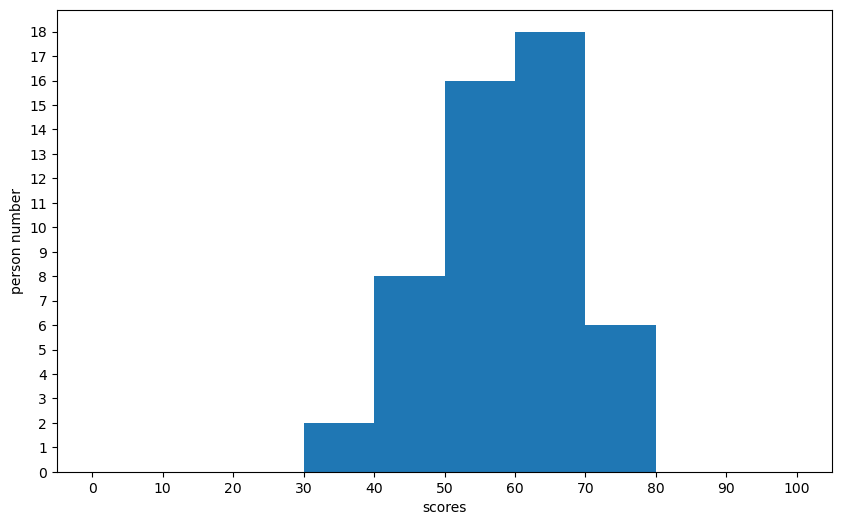

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('scores')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

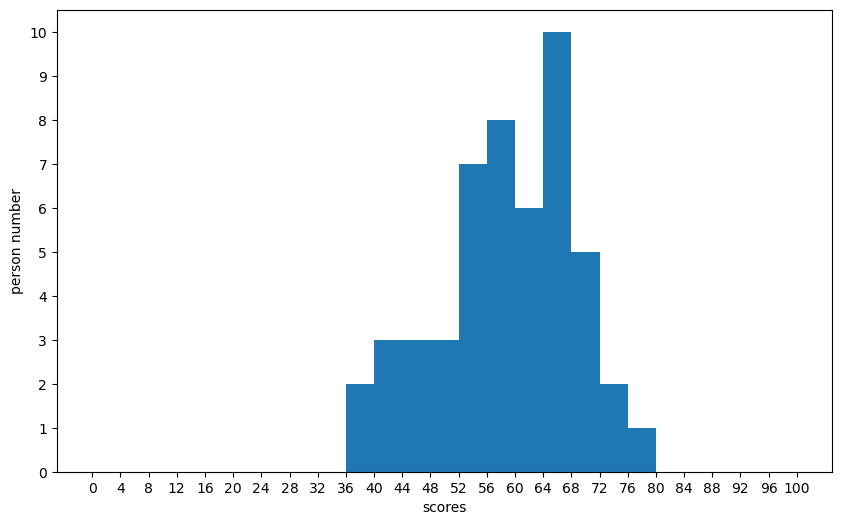

In [44]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('scores')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

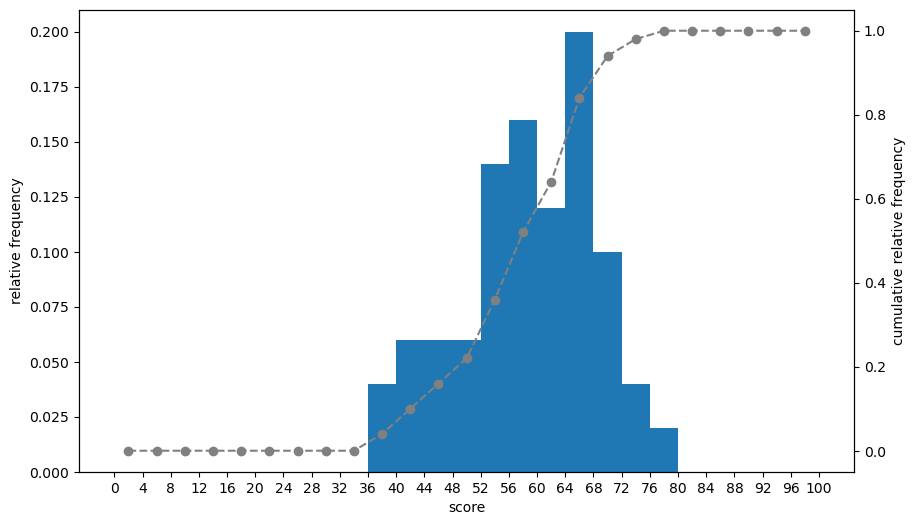

In [49]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores)/ len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color = 'gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()